In [53]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import datetime
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 500)
from __future__ import print_function
import math
import csv
import glob

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# visualization
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline

#sentiment analysis
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords


# technical analaysis  
import talib
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY

# machine learning
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
tf.logging.set_verbosity(tf.logging.ERROR)
from sklearn.preprocessing import MinMaxScaler

In [45]:
#price_df = pd.read_csv('data/processed_btc_price_data_2014-12-01_to_2018-11-11.csv')
price_df = pd.read_csv('data/processed_btc_prices_ohlcvvw_2014-12-01_to_2018-11-11.csv')

price_df = price_df.drop(columns='Unnamed: 0')

In [21]:
tweet_df = pd.read_csv('data/processed_tweet_data_1030-rows.csv')
tweet_df = tweet_df.drop(columns='Unnamed: 0')

In [46]:
price_tweet_df = (price_df.merge(tweet_df, on='date'))
price_tweet_df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
count,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0
mean,4009.0,4010.7,4007.0,4009.0,7.9,45018.7,4008.9,170184.7,262.9,216.8,377.2,684.9,114.2,556.6,466.8,152.9,262.9,403.6,799.1,-422.0,619.7,-63.2,-0.9,-0.3
std,4106.9,4109.5,4104.2,4106.9,6.6,84648.8,4106.8,185830.5,277.3,232.0,398.6,725.9,128.4,590.5,494.9,170.1,277.3,430.0,850.3,461.4,660.4,136.1,0.4,0.9
min,191.0,200.2,190.2,199.8,0.0,2.3,195.3,5338.0,3.0,-2.0,14.0,18.0,0.0,16.0,13.0,1.0,3.0,9.0,21.0,-1303.0,19.0,-622.0,-1.0,-1.0
25%,516.5,516.7,516.2,516.5,4.0,2049.8,516.5,15028.8,34.0,26.3,43.0,70.0,8.0,63.0,48.0,11.0,34.0,49.0,78.0,-934.2,60.0,-98.2,-1.0,-1.0
50%,2342.8,2343.8,2341.6,2342.8,5.9,15969.2,2342.7,33416.0,70.0,56.3,87.5,167.0,24.0,131.0,114.0,33.0,70.0,104.5,190.0,-106.0,147.0,-15.5,-1.0,-1.0
75%,6705.8,6706.9,6704.7,6705.8,9.8,48633.1,6705.8,401183.2,566.0,472.1,844.0,1556.2,249.0,1254.0,1052.5,333.0,566.0,887.2,1844.0,-34.0,1404.2,9.0,-1.0,1.0
max,19420.2,19430.8,19408.3,19419.9,59.1,971279.3,19419.5,448986.0,903.0,736.3,1108.0,1801.0,465.0,1599.0,1301.0,614.0,903.0,1324.0,2048.0,35.0,1699.0,487.0,1.0,1.0


In [47]:
price_tweet_df['signal_textBlob'].value_counts()

-1    974
 1     37
 0      1
Name: signal_textBlob, dtype: int64

In [48]:
#set date as index
price_tweet_df = price_tweet_df.set_index('date')

C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(

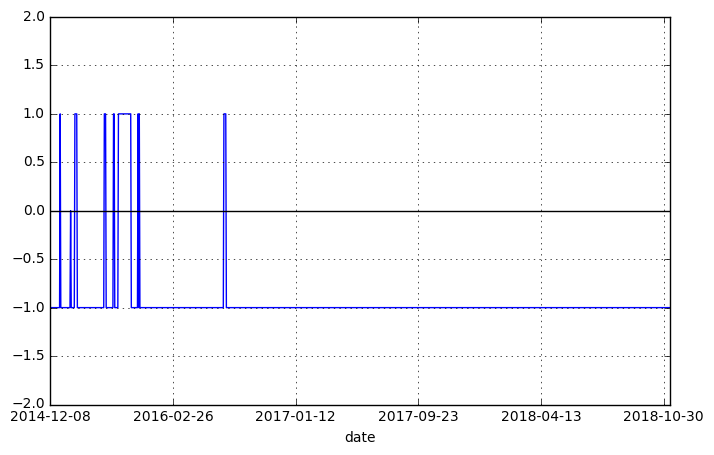

In [55]:
price_tweet_df['signal_textBlob'].plot(ylim = (-2,2), figsize = (8,5), grid = True).axhline(y = 0, color = "black")
#plt.tight_layout()
#plt.figure(figsize = (15,12))
#plt.show()

C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(

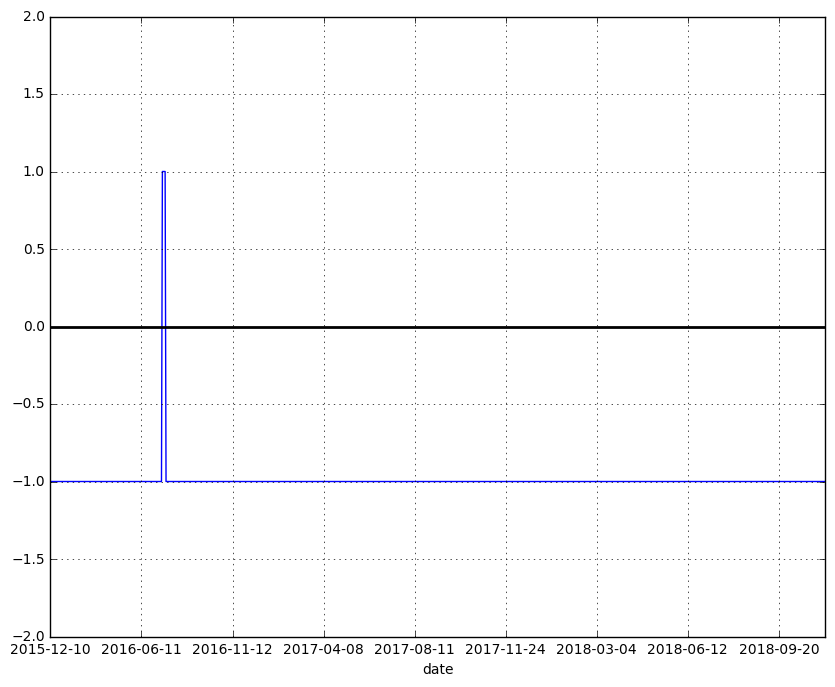

In [56]:
price_tweet_df.loc['2015-12-08':'2018-11-10', 'signal_textBlob'].plot(ylim = (-2,2), figsize = (10,8), grid = True).axhline(y = 0, color = "black", lw = 2)

In [ ]:
# # To ensure that all trades close out, I temporarily change the regime of the last row to 0
# regime_orig = price_tweet_df.ix[-1, "signal_textBlob"]
# price_tweet_df.ix[-1, "Regime"] = 0
# price_tweet_df["Signal"] = np.sign(price_tweet_df["Regime"] - price_tweet_df["Regime"].shift(1))
# # Restore original regime data
# price_tweet_df.ix[-1, "Regime"] = regime_orig
# price_tweet_df.tail()

In [40]:
# price at every buy 
price_tweet_df.loc[price_tweet_df["signal_textBlob"] == 1, "Close"]

date
2015-02-10   219.4
2015-03-27   249.0
2015-03-28   252.5
2015-03-29   245.0
2015-03-30   247.4
2015-07-04   258.1
2015-07-09   270.5
2015-07-15   290.8
2015-08-08   270.7
2015-08-10   265.5
2015-08-29   230.7
2015-09-01   228.2
2015-09-02   229.1
2015-09-03   227.9
2015-09-09   240.4
2015-09-10   239.3
2015-09-11   240.6
2015-09-12   238.1
2015-09-13   232.6
2015-09-15   231.1
2015-09-16   229.2
2015-09-17   232.1
2015-09-18   233.6
2015-09-19   232.8
2015-10-01   238.3
2015-10-02   238.4
2015-10-03   239.6
2015-10-04   239.7
2015-10-05   239.7
2015-10-06   244.9
2015-10-07   245.3
2015-11-08   379.0
2015-11-10   353.5
2016-07-18   677.7
2016-07-19   673.2
2016-07-21   666.2
2016-07-22   661.0
Name: Close, dtype: float64

In [41]:
# price at every sell
price_tweet_df.loc[price_tweet_df["signal_textBlob"] == -1, "Close"]

date
2014-12-08    375.0
2014-12-18    340.0
2015-01-12    260.0
2015-01-15    207.6
2015-01-16    203.0
2015-01-17    199.8
2015-01-20    217.7
2015-01-23    225.7
2015-01-24    248.6
2015-01-27    260.6
2015-02-01    222.6
2015-02-03    234.4
2015-02-04    225.8
2015-02-05    221.0
2015-02-06    222.1
2015-02-09    221.0
2015-02-11    220.8
2015-02-12    221.3
2015-02-19    239.9
2015-02-20    245.2
2015-02-21    245.8
2015-02-24    239.2
2015-02-26    237.9
2015-03-02    267.3
2015-03-03    278.1
2015-03-04    278.0
2015-03-05    272.1
2015-03-06    273.0
2015-03-07    275.2
2015-03-09    285.7
              ...  
2018-10-12   6207.1
2018-10-13   6200.0
2018-10-14   6226.2
2018-10-15   6407.6
2018-10-16   6441.9
2018-10-17   6437.8
2018-10-18   6419.4
2018-10-19   6381.9
2018-10-20   6404.8
2018-10-21   6430.9
2018-10-22   6403.3
2018-10-23   6393.4
2018-10-24   6424.2
2018-10-25   6399.1
2018-10-26   6402.5
2018-10-27   6406.3
2018-10-28   6403.7
2018-10-29   6306.9
2018-10-30   62

In [50]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
btc_signals = pd.concat([
        pd.DataFrame({"Price": price_tweet_df.loc[price_tweet_df["signal_textBlob"] == 1, "Close"],
                     "Regime": price_tweet_df.loc[price_tweet_df["signal_textBlob"] == 1, "signal_textBlob"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": price_tweet_df.loc[price_tweet_df["signal_textBlob"] == -1, "Close"],
                     "Regime": price_tweet_df.loc[price_tweet_df["signal_textBlob"] == -1, "signal_textBlob"],
                     "Signal": "Sell"}),
    ])
btc_signals.sort_index(inplace = True)
btc_signals

,Price,Regime,Signal
date,,,
2014-12-08,375.0,-1,Sell
2014-12-18,340.0,-1,Sell
2015-01-12,260.0,-1,Sell
2015-01-15,207.6,-1,Sell
2015-01-16,203.0,-1,Sell
2015-01-17,199.8,-1,Sell
2015-01-20,217.7,-1,Sell
2015-01-23,225.7,-1,Sell
2015-01-24,248.6,-1,Sell


In [51]:
# Let's see the profitability of long trades
btc_long_profits = pd.DataFrame({
        "Price": btc_signals.loc[(btc_signals["Signal"] == "Buy") &
                                  btc_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(btc_signals["Price"] - btc_signals["Price"].shift(1)).loc[
            btc_signals.loc[(btc_signals["Signal"].shift(1) == "Buy") & (btc_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": btc_signals["Price"].loc[
            btc_signals.loc[(btc_signals["Signal"].shift(1) == "Buy") & (btc_signals["Regime"].shift(1) == 1)].index
        ].index
    })
btc_long_profits

,End Date,Price,Profit
date,,,
2015-02-10,2015-02-11,219.4,1.4
2015-03-27,2015-03-28,249.0,3.6
2015-03-28,2015-03-29,252.5,-7.6
2015-03-29,2015-03-30,245.0,2.4
2015-03-30,2015-04-01,247.4,-2.1
2015-07-04,2015-07-09,258.1,12.4
2015-07-09,2015-07-15,270.5,20.3
2015-07-15,2015-07-16,290.8,-10.1
2015-08-08,2015-08-10,270.7,-5.2


In [58]:
# source: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
#     if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
#         weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
#         ax.xaxis.set_major_locator(mondays)
#         ax.xaxis.set_minor_locator(alldays)
#     else:
#         weekFormatter = DateFormatter('%b %d, %Y')
    weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

pandas_candlestick_ohlc(price_tweet_df)

NameError: name 'date2num' is not defined

ValueError: DateFormatter found a value of x=0, which is an illegal date.  This usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

In [59]:
#Let’s now create a simulated portfolio of $1,000,000, and see how it would behave, according to the rules we have established. This includes:
#Investing only 10% of the portfolio in any trade
#Exiting the position if losses exceed 20% of the value of the trade.

# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": btc_long_profits.index,
                            "End": btc_long_profits["End Date"]})
btc_long_profits["Low"] = tradeperiods.apply(lambda x: min(price_tweet_df.loc[x["Start"]:x["End"], "Low"]), axis = 1)
btc_long_profits

,End Date,Price,Profit,Low
date,,,,
2015-02-10,2015-02-11,219.4,1.4,219.3
2015-03-27,2015-03-28,249.0,3.6,248.9
2015-03-28,2015-03-29,252.5,-7.6,244.9
2015-03-29,2015-03-30,245.0,2.4,244.9
2015-03-30,2015-04-01,247.4,-2.1,245.2
2015-07-04,2015-07-09,258.1,12.4,258.0
2015-07-09,2015-07-15,270.5,20.3,270.4
2015-07-15,2015-07-16,290.8,-10.1,280.7
2015-08-08,2015-08-10,270.7,-5.2,265.4


In [60]:
# Now we have all the information needed to simulate this strategy in btc_long_profits
cash = 1000000
btc_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in btc_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    btc_backtest = btc_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)

btc_backtest

,End Date,End Port. Value,Profit per Share,Share Price,Shares,Start Port. Value,Stop-Loss Triggered,Total Profit,Trade Value
2015-02-10,2015-02-11,1000576.6,1.4,219.4,400.0,1000000.0,0.0,576.6,87754.7
2015-03-27,2015-03-28,1002011.4,3.6,249.0,400.0,1000576.6,0.0,1434.8,99583.1
2015-03-28,2015-03-29,999739.5,-7.6,252.5,300.0,1002011.4,0.0,-2271.9,75763.5
2015-03-29,2015-03-30,1000718.5,2.4,245.0,400.0,999739.5,0.0,979.0,97988.7
2015-03-30,2015-04-01,999872.0,-2.1,247.4,400.0,1000718.5,0.0,-846.4,98967.7
2015-07-04,2015-07-09,1003598.5,12.4,258.1,300.0,999872.0,0.0,3726.5,77422.2
2015-07-09,2015-07-15,1009701.2,20.3,270.5,300.0,1003598.5,0.0,6102.7,81148.7
2015-07-15,2015-07-16,1006677.2,-10.1,290.8,300.0,1009701.2,0.0,-3024.0,87251.4
2015-08-08,2015-08-10,1005128.1,-5.2,270.7,300.0,1006677.2,0.0,-1549.1,81196.8
2015-08-10,2015-08-12,1006010.6,2.9,265.5,300.0,1005128.1,0.0,882.5,79647.7


C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
C:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(

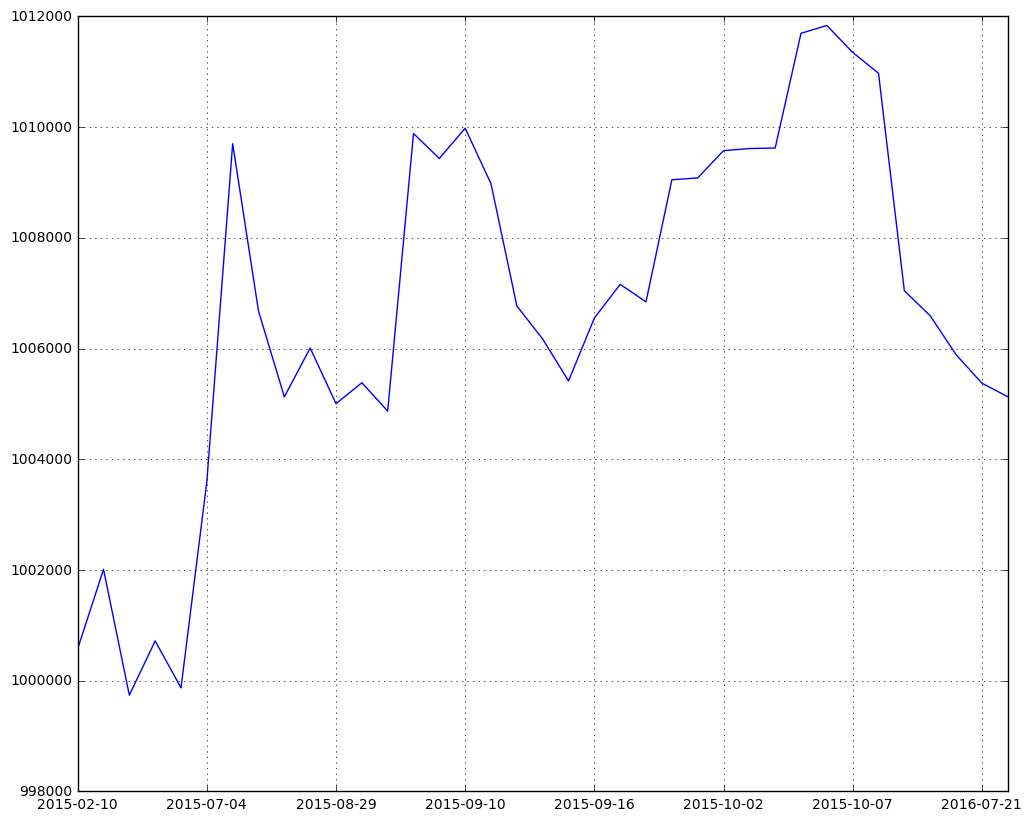

In [63]:
btc_backtest["End Port. Value"].plot(figsize = (12,10), grid = True)